## Importy i połączenie

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

# Styl wykresów
sns.set(style="whitegrid")
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get MongoDB configuration from environment variables
MONGO_URI = os.getenv("MONGO_URI")
DB_NAME = os.getenv("DB_NAME")

# Establish connection
client = MongoClient(MONGO_URI)
db = client[DB_NAME]


# Pobieranie danych
hotels = list(db["hotels"].find({}, {"_id": 0}))
reservations = list(db["reservations"].find({}, {"_id": 0}))
guests = list(db["guests"].find({}, {"_id": 0}))


## Analiza średnich cen pokoi

C:\Users\straysheep\AppData\Local\Temp\ipykernel_18864\1328076857.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prices, x="hotel", y="price", palette="Blues_d")


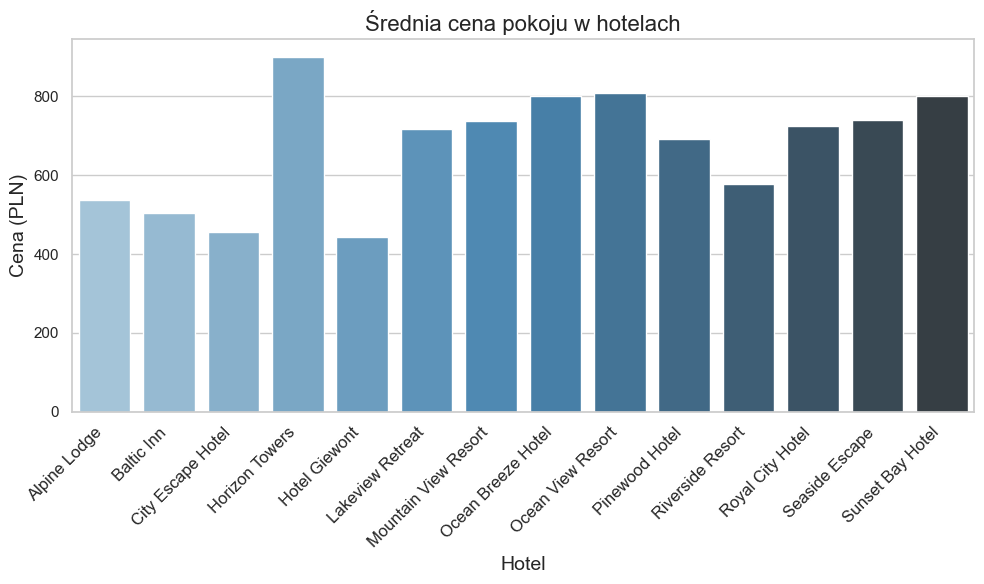

In [13]:
rooms_data = []
for hotel in hotels:
    for room in hotel["rooms"]:
        room["hotel"] = hotel["name"]
        rooms_data.append(room)

# Create DataFrame
df_rooms = pd.DataFrame(rooms_data)

# Calculate average price per hotel
avg_prices = df_rooms.groupby("hotel")["price"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))  # Increased size for better readability
sns.barplot(data=avg_prices, x="hotel", y="price", palette="Blues_d")

# Set title and labels
plt.title("Średnia cena pokoju w hotelach", fontsize=16)
plt.ylabel("Cena (PLN)", fontsize=14)
plt.xlabel("Hotel", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and adjust font size

# Tight layout to make everything fit nicely
plt.tight_layout()
plt.show()


## Liczba rezerwacji wg statusu

C:\Users\straysheep\AppData\Local\Temp\ipykernel_18864\99559893.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_counts, x="status", y="count", palette="Set2")


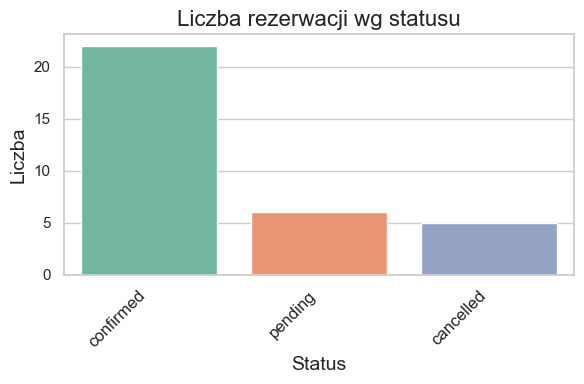

In [14]:
# Create DataFrame from reservations
df_res = pd.DataFrame(reservations)

# Count occurrences of each status
status_counts = df_res["status"].value_counts().reset_index()
status_counts.columns = ["status", "count"]

# Plot
plt.figure(figsize=(6, 4))  # Adjust figure size for better readability
sns.barplot(data=status_counts, x="status", y="count", palette="Set2")

# Set title and labels
plt.title("Liczba rezerwacji wg statusu", fontsize=16)
plt.xlabel("Status", fontsize=14)
plt.ylabel("Liczba", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and adjust font size

# Tight layout to make everything fit nicely
plt.tight_layout()
plt.show()

## Liczba dostępnych pokoi w każdym hotelu

C:\Users\straysheep\AppData\Local\Temp\ipykernel_18864\2284932163.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avail, x="hotel", y="available_rooms", palette="Greens_d")


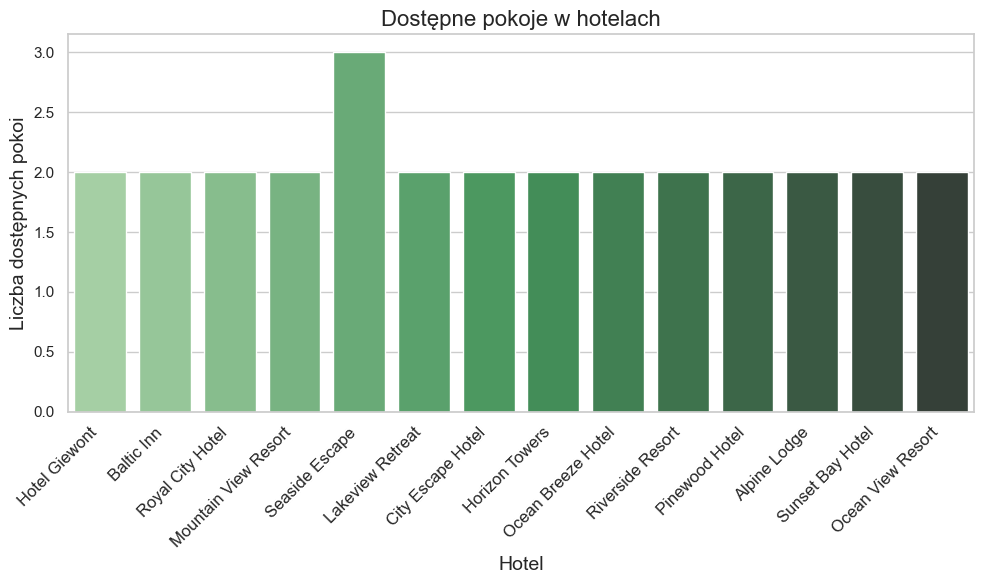

In [15]:
available_counts = []
for hotel in hotels:
    available = sum(1 for r in hotel["rooms"] if r["available"])
    available_counts.append({"hotel": hotel["name"], "available_rooms": available})

# Create DataFrame
df_avail = pd.DataFrame(available_counts)

# Plot
plt.figure(figsize=(10, 6))  # Increased size for better readability
sns.barplot(data=df_avail, x="hotel", y="available_rooms", palette="Greens_d")

# Set title and labels
plt.title("Dostępne pokoje w hotelach", fontsize=16)
plt.ylabel("Liczba dostępnych pokoi", fontsize=14)
plt.xlabel("Hotel", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and adjust font size

# Tight layout to make everything fit nicely
plt.tight_layout()
plt.show()